# -------------------------------Experiment - 10------------------------------------

# Consider the Fish dataset build,test,evaluete the Support Vector Machine model for multiple classification.

In [1]:
# Import the Libraries 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Dataset read csv file

df = pd.read_csv("C:/Users/mehta/AIML-20CS51I/DataSets/dataset_Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
# warnings ignore 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# show the unique columns
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
# Pre-processing 

df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
# Split the data 

X = df.drop('Species',axis=1)   # features
y = df['Species'] #target

In [7]:
# Scaling the input features using MinMaxScaler 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [8]:
X_scaled[0:5]

array([[0.14666667, 0.30485437, 0.30909091, 0.35810811, 0.56833405,
        0.41897835],
       [0.17575758, 0.32038835, 0.32545455, 0.37837838, 0.62405535,
        0.45923545],
       [0.20606061, 0.3184466 , 0.32909091, 0.37668919, 0.61812335,
        0.51427887],
       [0.22      , 0.36504854, 0.37454545, 0.41722973, 0.63856611,
        0.48036479],
       [0.26060606, 0.36893204, 0.37454545, 0.42567568, 0.6219658 ,
        0.57600361]])

In [9]:
# Label Encoding the target variable using LabelEncoder 

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [10]:
# Splitting into train and test datasets using train_test_split 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Model Building and training 

from sklearn.svm import SVC
su_ve = SVC()
# training the model
su_ve.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
# Predicting

y_pred = su_ve.predict(X_test)

In [13]:
# Evaluete model 

#Show accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.875


In [17]:
# Show Confusion_matrix

print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[10  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  9  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  3  0  0  0  0]]


In [19]:
cm=metrics.confusion_matrix(y_test, y_pred)
print("com is",cm)

com is [[10  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  9  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  3  0  0  0  0]]


<Axes: >

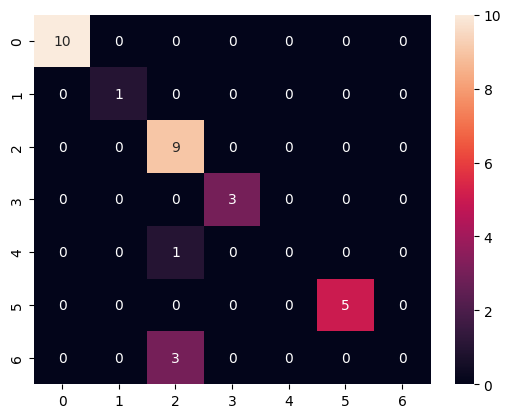

In [21]:
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')

In [22]:
# Show Classification_report

print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         1
           2       0.69      1.00      0.82         9
           3       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         5
           6       0.00      0.00      0.00         3

    accuracy                           0.88        32
   macro avg       0.67      0.71      0.69        32
weighted avg       0.79      0.88      0.82        32

